In [7]:
import os

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import numpy as np
import pandas as pd

In [4]:
df_drive_log = pd.read_csv(os.path.join('data', 'driving_log.csv'))

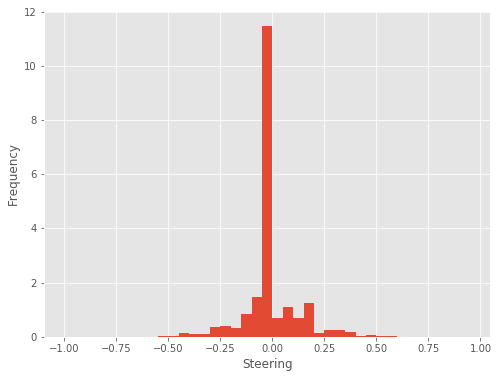

In [11]:
# Steering histogram
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
bins = np.arange(-1, 1, 0.05)
df_drive_log['steering'].plot(kind='hist', bins=bins, normed=True, ax=ax)
ax.set_xlabel('Steering')
plt.savefig(os.path.join('images', 'steering_histogram.jpg'))
plt.show()

In [5]:
df_drive_log.head()

,center,left,right,steering,throttle,brake,speed
0,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.148290
1,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
2,IMG/center_2016_12_01_13_31_12_937.jpg,IMG/left_2016_12_01_13_31_12_937.jpg,IMG/right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
3,IMG/center_2016_12_01_13_31_13_037.jpg,IMG/left_2016_12_01_13_31_13_037.jpg,IMG/right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419
4,IMG/center_2016_12_01_13_31_13_177.jpg,IMG/left_2016_12_01_13_31_13_177.jpg,IMG/right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236


In [12]:
df_sample = df_drive_log.sample(n=16)

In [16]:
filenames_center = df_sample['center'].values
steering = df_sample['steering'].values

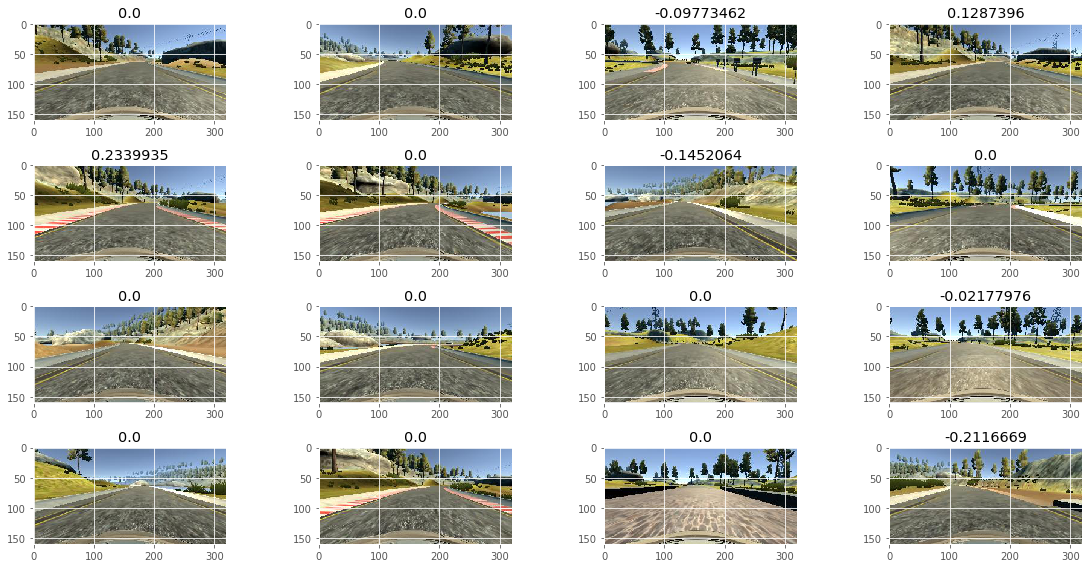

In [27]:
plt.figure(figsize=(16, 8))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    img = mpimg.imread(os.path.join('data', filenames_center[i]))
    plt.imshow(img)
    plt.title(str(steering[i]))
    
plt.tight_layout()
plt.savefig(os.path.join('images', 'center_images.jpg'))
plt.show()

In [29]:
samples = [2793, 1938, 7363]
filenames_center = df_sample.loc[samples, :]['center'].values
filenames_left = df_sample.loc[samples, :]['left'].values
filenames_right = df_sample.loc[samples, :]['right'].values
steering = df_sample.loc[samples, :]['steering'].values

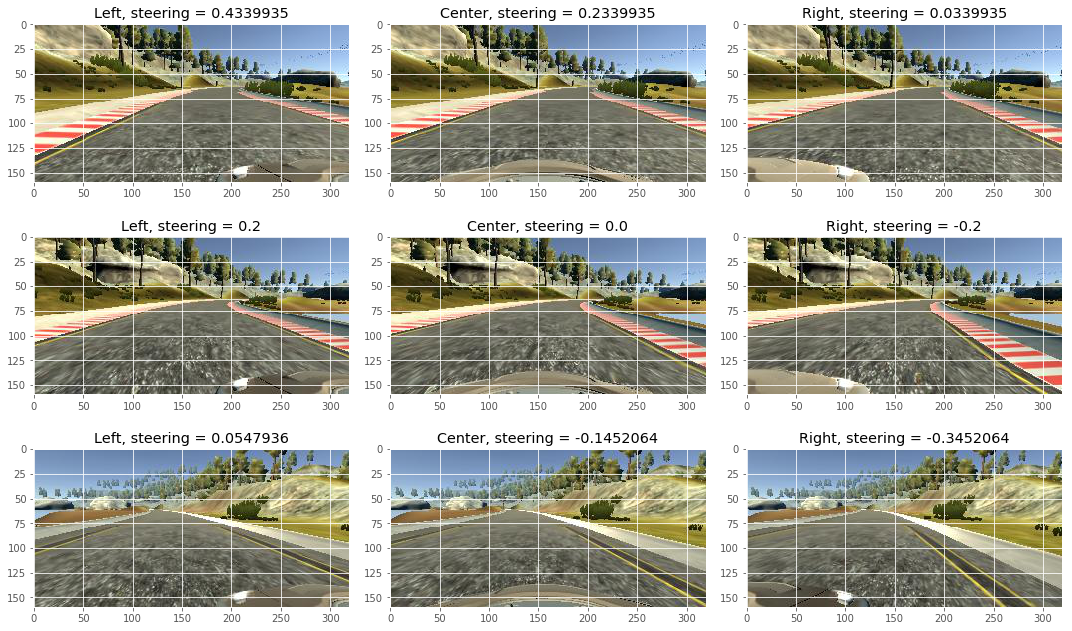

In [39]:
plt.figure(figsize=(15, 9))
for i in range(9):
    n_subplot = i + 1
    index = i // 3
    if n_subplot % 3 == 1:
        img = mpimg.imread(os.path.join('data', filenames_left[index].strip()))
        title = 'Left, steering = {}'.format(str(steering[index] + 0.2))
    if n_subplot % 3 == 2:
        img = mpimg.imread(os.path.join('data', filenames_center[index].strip()))
        title = 'Center, steering = {}'.format(str(steering[index]))
    if n_subplot % 3 == 0:
        img = mpimg.imread(os.path.join('data', filenames_right[index].strip()))
        title = 'Right, steering = {}'.format(str(steering[index] - 0.2))
    plt.subplot(3, 3, n_subplot)
    plt.imshow(img)
    plt.title(title)

plt.tight_layout()
plt.savefig(os.path.join('images', 'left_center_right.jpg'))
plt.show()